In [2]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import pickle

In [3]:
def get_candidates(n):
    candidates = np.zeros((n,4))

    candidates[:,3] = np.arange(n)

    candidates[:,:2] = np.random.random((n,2))
    return candidates

def get_scores(candidates, bias):
    candidates[:,2] = bias*candidates[:,0] + (1-bias)*candidates[:,1]
    return candidates

def refine_candidates(candidates, percentile, num_left):
    n = candidates.shape[0]
    m = np.ceil(n*(1-percentile)).astype(int)
    mask = candidates[:,2].argsort()[-m:]
    mask = np.random.choice(mask, num_left, replace=False)
    return candidates[mask]

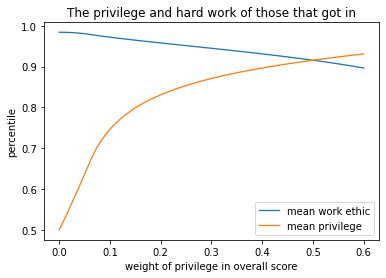

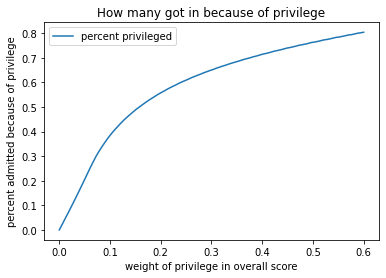

In [15]:
n = 100

mean_priv = np.zeros(n)
mean_work = np.zeros(n)
privileged = np.zeros(n)
biases = np.linspace(0,.6,n)

def simulate(bias):
    work = 0
    priv = 0
    perc = 0
    m = 1000
    for j in range(m):
        candidates = get_candidates(33824)
        candidates = get_scores(candidates,bias)
        bias_top = candidates[:,2].argsort()[-1085:]
        work_top = candidates[:,1].argsort()[-1085:]
        work  += candidates[bias_top][:,1].mean()
        priv += candidates[bias_top][:,0].mean()
        perc += 1 - len(np.intersect1d(bias_top,work_top))/1085
    mean_work = work/m
    mean_priv = priv/m
    privileged = perc/m
    return mean_work, mean_priv, privileged

# with Pool(8) as p:
#     temp = p.map(simulate, biases)
# temp = np.array(temp)

# with open('unrefined.pickle','wb') as out:
#     pickle.dump(temp, out)
with open('unrefined.pickle','rb') as in_file:
    temp = pickle.load(in_file)

mean_work = temp[:,0]
mean_priv = temp[:,1]
privileged = temp[:,2]

plt.plot(biases, mean_work, label='mean work ethic',lw=1.3)
plt.plot(biases, mean_priv, label='mean privilege',lw=1.3)
plt.legend()
plt.title('The privilege and hard work of those that got in')
plt.xlabel('weight of privilege in overall score')
plt.ylabel('percentile')
plt.savefig('means_against_bias')
plt.show()

plt.plot(biases, privileged, label='percent privileged')
plt.xlabel('weight of privilege in overall score')
plt.ylabel('percent admitted because of privilege')
plt.title('How many got in because of privilege')
plt.legend()
plt.savefig('percent_privileged')
plt.show()

In [15]:
num_candidates = 100000
num_positions = 500
mean_work = 0
mean_priv = 0
privileged = 0
sims = 100000

def simulate_2(i):
    candidates = get_candidates(num_candidates)
    candidates = get_scores(candidates,.05)
    bias_top = candidates[:,2].argsort()[-num_positions:]
    work_top = candidates[:,1].argsort()[-num_positions:]
    mean_work = candidates[bias_top][:,1].mean()
    mean_priv = candidates[bias_top][:,0].mean()
    privileged = 1 - len(np.intersect1d(bias_top,work_top))/num_candidates
    return mean_work, mean_priv, privileged

with Pool(8) as p:
    temp = p.map(simulate_2, range(sims))
temp = np.array(temp)

mean_work = temp[:,0].mean()
mean_priv = temp[:,1].mean()
privileged = temp[:,2].mean()

with open('ceo_example.pickle','wb') as out:
    pickle.dump((mean_work, mean_priv, privileged), out)
# with open('ceo_example.pickle','rb') as in_file:
#     mean_work, mean_priv, privileged = pickle.load(in_file)

print(f'mean hard work {mean_work}')
print(f'mean privilege {mean_priv}')
print(f'percent privileged {privileged}')

mean hard work 0.9923447728348158
mean privilege 0.8546594849336584
percent privileged 0.9980587823999999


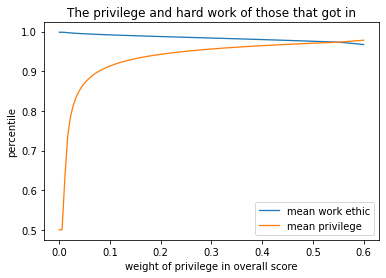

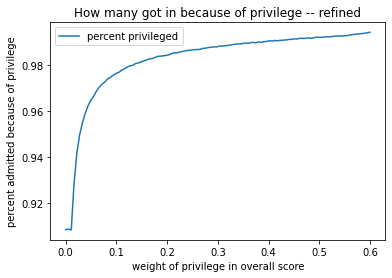

In [16]:
n = 110

mean_priv = np.zeros(n)
mean_work = np.zeros(n)
privileged = np.zeros(n)
biases = np.linspace(0,.6,n)
    
def simulation(bias):
    work = 0
    priv = 0
    perc = 0
    m = 1000
    for j in range(m):
        candidates = get_candidates(int(3.7e6))
        candidates = get_scores(candidates,bias)
        refinement = refine_candidates(candidates, .9, 33824)

        bias_top = refinement[:,2].argsort()[-1085:]
        work_top = candidates[:,1].argsort()[-1085:]

        work += refinement[bias_top][:,1].mean()
        priv += refinement[bias_top][:,0].mean()

        bias_ids = refinement[bias_top][:,3]
        work_ids = candidates[work_top][:,3]
        perc += 1 - len(np.intersect1d(bias_ids,work_ids))/1085

    mean_work = work/m
    mean_priv  = priv/m
    privileged  = perc/m
    return mean_work, mean_priv, privileged

# with Pool(16) as p:
#     temp = p.map(simulation, biases)
# temp = np.array(temp)

# with open('refined_data.pickle','wb') as out:
#     pickle.dump(temp, out)
with open('refined_data.pickle','rb') as in_file:
    temp = pickle.load(in_file)

mean_work = temp[:,0]
mean_priv = temp[:,1]
privileged = temp[:,2]

plt.plot(biases, mean_work, label='mean work ethic',lw=1.3)
plt.plot(biases, mean_priv, label='mean privilege',lw=1.3)
plt.legend()
plt.title('The privilege and hard work of those that got in -- refined')
plt.xlabel('weight of privilege in overall score')
plt.ylabel('percentile')
plt.savefig('refined_means_against_bias')
plt.show()

plt.plot(biases, privileged, label='percent privileged')
plt.xlabel('weight of privilege in overall score')
plt.ylabel('percent admitted because of privilege')
plt.title('How many got in because of privilege -- refined')
plt.legend()
plt.savefig('refined_percent_privileged')
plt.show()

In [9]:
temp

array([[0.99839479, 0.50022425, 0.90879171],
       [0.99806222, 0.63180215, 0.90842028],
       [0.99730186, 0.73563294, 0.92860922],
       [0.99668857, 0.7847938 , 0.94166728],
       [0.99616711, 0.81388951, 0.94968848],
       [0.99570264, 0.8341543 , 0.95483041],
       [0.99528091, 0.84884518, 0.95896866],
       [0.99488734, 0.86060007, 0.96227189],
       [0.99451744, 0.86989785, 0.96463779],
       [0.99418221, 0.87749845, 0.96634562],
       [0.99384562, 0.88410245, 0.9685871 ],
       [0.99352485, 0.8899316 , 0.9702682 ],
       [0.99320754, 0.89499365, 0.97162673],
       [0.99292416, 0.89927362, 0.97256313],
       [0.99263469, 0.90316333, 0.97392074],
       [0.99235808, 0.90673379, 0.9745871 ],
       [0.99208393, 0.90990193, 0.97552811],
       [0.99180893, 0.91298604, 0.97628664],
       [0.99155778, 0.91551802, 0.97677143],
       [0.99130277, 0.91804973, 0.97766544],
       [0.99105347, 0.92028045, 0.97824147],
       [0.99080332, 0.9225008 , 0.97907189],
       [0.